## Results: Final configuration

In [1]:
import sys
sys.path.append("C:/Users/matth/Documents/Martinos Center/mrtoct") 

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm
import utils.test_utils as utils
import os
import pickle
import numpy as np
import gc
from scipy.stats import ttest_ind
import matplotlib

In [2]:
path_model = "C:/Users/matth/Documents/Martinos Center/Models/DeepBrain/"
path_dataset = "C:/Users/matth/Documents/Martinos Center/mrtoct/datasets/"
path_notebook = "C:/Users/matth/Documents/Martinos Center/mrtoct/notebooks/"

Run these lines in the command prompt to generate the dataset and train models.

##### Preprocessing:

* <font color = blue>python preprocessing.py --dataset ctmask_nosqrt_3d --format 3d_64 --no_sqrt --tanh --mask_opt 1</font>


##### Training: 
        
* <font color = blue>python train.py --dataset ctmask_nosqrt_3d --name ctmask_l1_l2_3d --l1_l2 --netG ResNet9_3D --netD Discriminator_3D --n_epochs 60</font>


In [ ]:
model_names = ["ctmask_l1_l2_3d"]
models, _ = utils.retrieve_models(model_names, path_model)
dataset = np.load(path_dataset + "/ctmask_nosqrt_3d" + "/" + "train.npz")
metrics, vol = utils.compute_test_metrics(models[0], "3d_64", dataset, recon_3d = True, width_2d = 64, sqrt = False)
np.save(os.path.join(path_notebook, "3d_64.npy"), vol)
metrics

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

In [3]:
model_names = ["koh_3d"]
models, _ = utils.retrieve_models(model_names, path_model)
dataset = np.load(path_dataset + "/ctmask_nosqrt_3d" + "/" + "test.npz")
metrics, gen_vol = utils.compute_test_metrics(models[0], "Koh 3d", dataset, recon_3d = True, width_2d = 64, sqrt = False)
np.save(os.path.join(path_notebook, "koh_3d.npy"), gen_vol)
metrics

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [13:19<00:00, 114.21s/it]


N =  1150730
sum mask:  1150730


,MAE,$\sigma_{MAE}$,MSE,$\sigma_{MSE}$,PSNR,$\sigma_{PSNR}$,SSIM,$\sigma_{SSIM}$
,,,,,,,,
Koh 3d,0.0777,0.0192,0.0178,0.0078,40.2692,5.7820,0.9357,0.0582


In [11]:
model_names = ["pixtopix"]
models, _ = utils.retrieve_models(model_names, path_model)
dataset = np.load(path_dataset + "/ctmask_nosqrt" + "/" + "test.npz")
metrics, vol_pixtopix = utils.compute_test_metrics(models[0], "Pixtopix", dataset, recon_3d = False, width_2d = 256, sqrt = False)
np.save(os.path.join(path_notebook, model_names[0] + ".npy"), vol_pixtopix)
metrics

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [00:31<00:00,  8.14it/s]


N =  1128557
sum mask:  1128557


,MAE,$\sigma_{MAE}$,MSE,$\sigma_{MSE}$,PSNR,$\sigma_{PSNR}$,SSIM,$\sigma_{SSIM}$
,,,,,,,,
Pixtopix,0.0883,0.0213,0.0238,0.0084,37.3745,11.5009,0.9497,0.0461


In [7]:
model_names = ["pixtopix"]
models, _ = utils.retrieve_models(model_names, path_model)
dataset = np.load(path_dataset + "ctmask_nosqrt_pct" + "/test.npz")
metrics, vol = utils.compute_test_metrics(models[0], "pct", dataset, recon_3d = False, width_2d = 256, sqrt = False, pct = True)
np.save(os.path.join(path_notebook, "pct.npy"), vol)
metrics

N =  1150730
sum mask:  1150730


,MAE,$\sigma_{MAE}$,MSE,$\sigma_{MSE}$,PSNR,$\sigma_{PSNR}$,SSIM,$\sigma_{SSIM}$
,,,,,,,,
pct,0.0952,0.0198,0.0272,0.0082,36.0404,6.0336,0.9390,0.0554


In [6]:
model_names = ["ctmask_l1_l2_3d_nobim"]
models, _ = utils.retrieve_models(model_names, path_model)
dataset = np.load(path_dataset + "/ctmask_nosqrt_3d" + "/" + "test.npz")
metrics, vol = utils.compute_test_metrics(models[0], "3d_64_nobim", dataset, recon_3d = True, width_2d = 64, sqrt = False)
np.save(os.path.join(path_notebook, "3d_64_nobim.npy"), vol)
metrics

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:48<00:00, 24.06s/it]


N =  1150730
sum mask:  1150730


,MAE,$\sigma_{MAE}$,MSE,$\sigma_{MSE}$,PSNR,$\sigma_{PSNR}$,SSIM,$\sigma_{SSIM}$
,,,,,,,,
3d_64_nobim,0.0761,0.0217,0.0169,0.0086,40.7940,6.0658,0.9358,0.0580


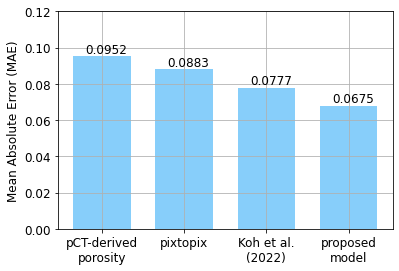

In [4]:
font = {'size'   : 12}
matplotlib.rc('font', **font)

fig, ax = plt.subplots()
res =  [0.0952, 0.0883, 0.0777, 0.0675]
ax.bar(['pCT-derived\nporosity', 'pixtopix', 'Koh et al.\n(2022)', 'proposed\nmodel'], res,  color = 'lightskyblue', width = 0.7)
ax.text(x = -0.2, y = 0.097, s = str(res[0]))
ax.text(x = 1-0.2, y = 0.09, s = str(res[1]))
ax.text(x = 2-0.2, y = 0.08, s = str(res[2]))
ax.text(x = 3-0.2, y = 0.07, s = str(res[3]))
ax.set_ylim([0, 0.12])
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.grid('on')
plt.savefig(path_notebook + 'final_bar.png', bbox_inches = 'tight')

### Student t-test 

In [3]:
model_names = ["ctmask_l1_l2_3d", "ctmask_l1_l2_3d_nobim"]
models, _ = utils.retrieve_models(model_names, path_model)
dataset = np.load(path_dataset + "ctmask_nosqrt_3d" + "/test_eval.npz")
maes, err1 = utils.compute_maes(models[0], dataset)
maes_nobim, err2 = utils.compute_maes(models[1], dataset)

In [4]:
t, pvalue = ttest_ind(maes_nobim, maes, equal_var = False, alternative = 'greater')

In [17]:
print(dataset['x'].shape[0])

118


In [5]:
print(pvalue)

0.18458882482316052


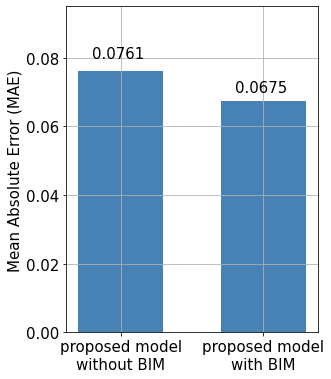

In [16]:

font = {'size'   : 15}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (4.5, 6))
res =  [0.0761, 0.0675]
error = [err1, err2]
heights = res
bars = np.arange(len(heights))
ax.bar(['proposed model\nwithout BIM', 'proposed model\nwith BIM'], res,  color = 'steelblue', width = 0.6)#, yerr=error, alpha=0.5, ecolor='black', capsize=5)#, fontsize=15)
ax.text(x = 0 - 0.2, y = 0.08, s = str(res[0]))
ax.text(x = 1 - 0.2, y = 0.07, s = str(res[1]))
ax.set_ylim([0, 0.095])
ax.set_ylabel('Mean Absolute Error (MAE)', fontsize=15)
ax.grid('on')
#barplot_annotate_brackets(0, 1, 'p < 0.003', bars, heights, dh=.07)
plt.savefig(path_notebook + 'bim_bar.png', bbox_inches = 'tight')

In [9]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

### Mosaic

In [3]:
_3d_64 = np.load(os.path.join(path_notebook, "3d_64.npy"))
koh_3d = np.load(os.path.join(path_notebook, "koh_3d.npy"))
pixtopix = np.load(os.path.join(path_notebook, "pixtopix.npy"))
pct = np.load(os.path.join(path_notebook, "pct.npy"))
vol_3d_nobim = np.load(os.path.join(path_notebook, "3d_64_nobim.npy"))

In [10]:
dataset = np.load(path_dataset + "/ctmask_nosqrt_3d" + "/" + "train.npz")
x, y = dataset['x'], dataset['y']

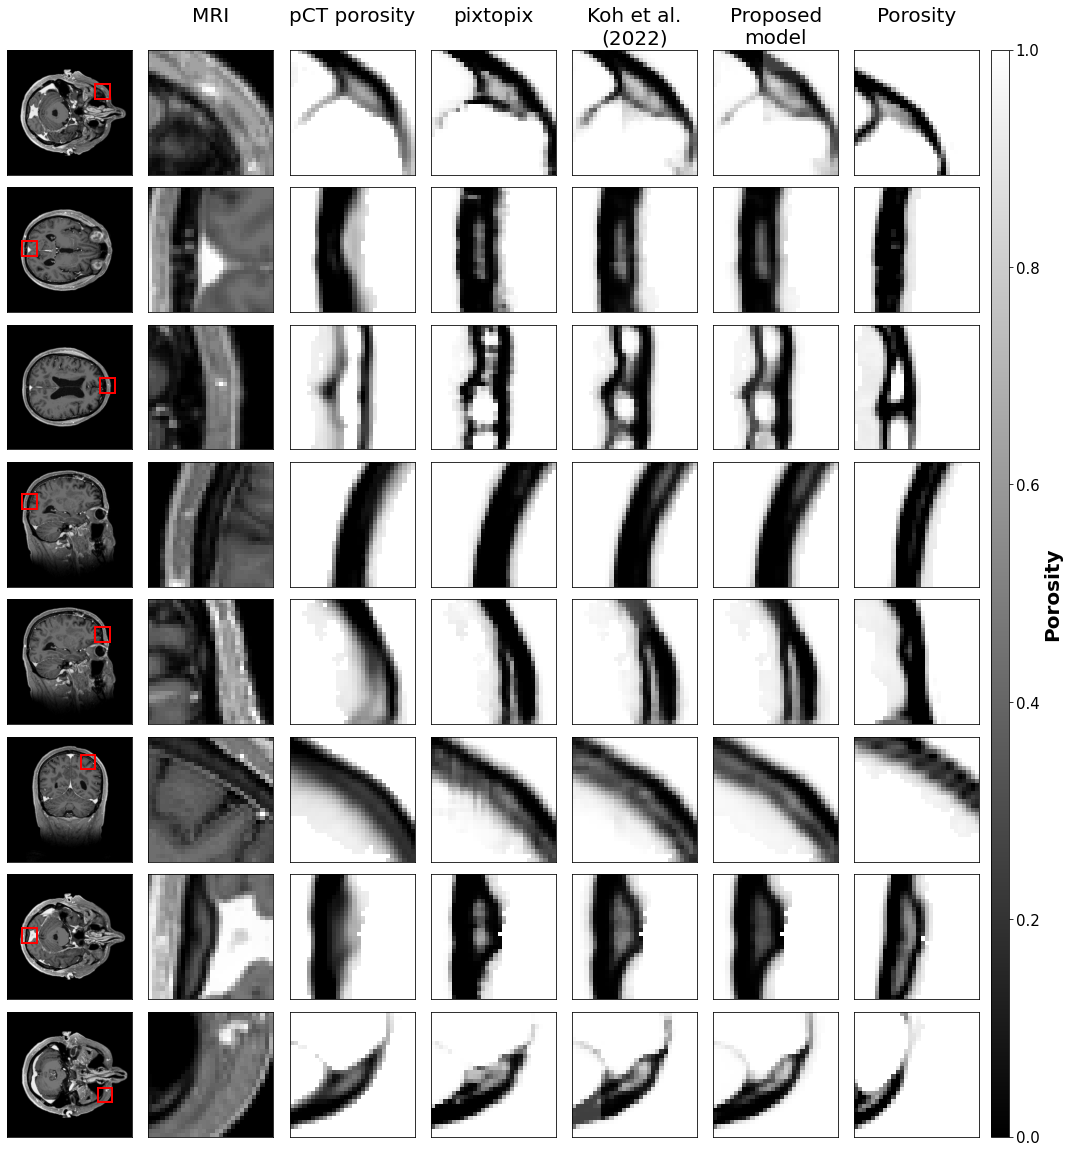

In [12]:
fig, ax = plt.subplots(8, 7, figsize=(20, 20))
from matplotlib.patches import Rectangle

for i in range(8):
    for j in range(7):
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
        #ax[i,j].tick_params(axis='both', labelsize = 12)
titles = ["", "MRI\n", "pCT porosity\n", "pixtopix\n", "Koh et al.\n(2022)", "Proposed\nmodel", "Porosity\n"]
for i in range(7):
    ax[0,i].set_title(titles[i], fontsize = 20)

im1 = ax[0,0].imshow(x[0,:,:,128, 0], cmap = "gray")
rect = Rectangle((180,70),30,30,linewidth=2,edgecolor='r',facecolor='none')
ax[0,0].add_patch(rect)

ax[0,1].imshow(x[0,70:100,180:210,128, 0], cmap = "gray")
im = ax[0,2].imshow(pct[0,70:100,180:210,128, 0], cmap = "gray")
ax[0,3].imshow(pixtopix[0,70:100,180:210,128, 0], cmap = "gray")
ax[0,4].imshow(koh_3d[0,70:100,180:210,128, 0], cmap = "gray")
ax[0,5].imshow(_3d_64[0,70:100,180:210,128, 0], cmap = "gray")
ax[0,6].imshow(y[0,70:100,180:210,128, 0], cmap = "gray")

ax[1,0].imshow(x[0,:,:,160, 0], cmap = "gray")
rect = Rectangle((30,110),30,30,linewidth=2,edgecolor='r',facecolor='none')
ax[1,0].add_patch(rect)

ax[1,1].imshow(x[0,110:140,30:60,160, 0], cmap = "gray")
ax[1,2].imshow(pct[0,110:140,30:60,160, 0], cmap = "gray")
ax[1,3].imshow(pixtopix[0,110:140,30:60,160, 0], cmap = "gray")
ax[1,4].imshow(koh_3d[0,110:140,30:60,160, 0], cmap = "gray")
ax[1,5].imshow(_3d_64[0,110:140,30:60,160, 0], cmap = "gray")
ax[1,6].imshow(y[0,110:140,30:60,160, 0], cmap = "gray")


ax[2,0].imshow(x[0,:,:,180, 0], cmap = "gray")
rect = Rectangle((190,110),30,30,linewidth=2,edgecolor='r',facecolor='none')
ax[2,0].add_patch(rect)

ax[2,1].imshow(x[0,110:140,190:220,180, 0], cmap = "gray")
ax[2,2].imshow(pct[0,110:140,190:220,180, 0], cmap = "gray")
ax[2,3].imshow(pixtopix[0,110:140,190:220,180, 0], cmap = "gray")
ax[2,4].imshow(koh_3d[0,110:140,190:220,180, 0], cmap = "gray")
ax[2,5].imshow(_3d_64[0,110:140,190:220,180, 0], cmap = "gray")
ax[2,6].imshow(y[0,110:140,190:220,180, 0], cmap = "gray")

ax[3,0].imshow(np.rot90(x[0,100,:,:, 0], k = 1), cmap = "gray")
rect = Rectangle((30, 256 - 160 - 30),30,30,linewidth=2,edgecolor='r',facecolor='none')
ax[3,0].add_patch(rect)

ax[3,1].imshow(np.rot90(x[0,100,30:60,160:190, 0], k = 1), cmap = "gray")
ax[3,2].imshow(np.rot90(pct[0,100,30:60,160:190, 0], k = 1), cmap = "gray")
ax[3,3].imshow(np.rot90(pixtopix[0,100,30:60,160:190, 0], k = 1), cmap = "gray")
ax[3,4].imshow(np.rot90(koh_3d[0,100,30:60,160:190, 0], k = 1), cmap = "gray")
ax[3,5].imshow(np.rot90(_3d_64[0,100,30:60,160:190, 0], k = 1), cmap = "gray")
ax[3,6].imshow(np.rot90(y[0,100,30:60,160:190, 0], k = 1), cmap = "gray")

ax[4,0].imshow(np.rot90(x[0,100,:,:, 0], k = 1), cmap = "gray")
rect = Rectangle((180, 256 - 170 - 30),30,30,linewidth=2,edgecolor='r',facecolor='none')
ax[4,0].add_patch(rect)

ax[4,1].imshow(np.rot90(x[0,100,180:210,170:200, 0], k = 1), cmap = "gray")
ax[4,2].imshow(np.rot90(pct[0,100,180:210,170:200, 0], k = 1), cmap = "gray")
ax[4,3].imshow(np.rot90(pixtopix[0,100,180:210,170:200, 0], k = 1), cmap = "gray")
ax[4,4].imshow(np.rot90(koh_3d[0,100,180:210,170:200, 0], k = 1), cmap = "gray")
ax[4,5].imshow(np.rot90(_3d_64[0,100,180:210,170:200, 0], k = 1), cmap = "gray")
ax[4,6].imshow(np.rot90(y[0,100,180:210,170:200, 0], k = 1), cmap = "gray")

ax[5,0].imshow(np.rot90(x[0,:, 80, :, 0], k = 1), cmap = "gray")
rect = Rectangle((150, 256 - 190 - 30),30,30,linewidth=2,edgecolor='r',facecolor='none')
ax[5,0].add_patch(rect)

ax[5,1].imshow(np.rot90(x[0,150:180, 80, 190:220, 0], k = 1), cmap = "gray")
ax[5,2].imshow(np.rot90(pct[0,150:180,80, 190:220, 0], k = 1), cmap = "gray")
ax[5,3].imshow(np.rot90(pixtopix[0,150:180,80, 190:220, 0], k = 1), cmap = "gray")
ax[5,4].imshow(np.rot90(koh_3d[0,150:180,80, 190:220, 0], k = 1), cmap = "gray")
ax[5,5].imshow(np.rot90(_3d_64[0,150:180,80, 190:220, 0], k = 1), cmap = "gray")
ax[5,6].imshow(np.rot90(y[0,150:180,80, 190:220, 0], k = 1), cmap = "gray")

ax[6,0].imshow(x[0,:,:,130, 0], cmap = "gray")
rect = Rectangle((30,110),30,30,linewidth=2,edgecolor='r',facecolor='none')
ax[6,0].add_patch(rect)

ax[6,1].imshow(x[0,110:140, 30:60, 130, 0], cmap = "gray")
ax[6,2].imshow(pct[0,110:140,30:60,130, 0], cmap = "gray")
ax[6,3].imshow(pixtopix[0,110:140,30:60,130, 0], cmap = "gray")
ax[6,4].imshow(koh_3d[0,110:140,30:60,130, 0], cmap = "gray")
ax[6,5].imshow(_3d_64[0,110:140,30:60,130, 0], cmap = "gray")
ax[6,6].imshow(y[0,110:140,30:60,130, 0], cmap = "gray")

ax[7,0].imshow(x[0,:,:,120, 0], cmap = "gray")
rect = Rectangle((185,155),30,30,linewidth=2,edgecolor='r',facecolor='none')
ax[7,0].add_patch(rect)

ax[7,1].imshow(x[0,155:185,185:215,120, 0], cmap = "gray")
ax[7,2].imshow(pct[0,155:185,185:215,120, 0], cmap = "gray")
ax[7,3].imshow(pixtopix[0,155:185,185:215,120, 0], cmap = "gray")
ax[7,4].imshow(koh_3d[0,155:185,185:215,120, 0], cmap = "gray")
ax[7,5].imshow(_3d_64[0,155:185,185:215,120, 0], cmap = "gray")
ax[7,6].imshow(y[0,155:185,185:215,120, 0], cmap = "gray")

plt.subplots_adjust(wspace=-0.4, hspace=0.1)

cax,kw = mpl.colorbar.make_axes([ax for ax in ax.flat], pad=0.01, aspect = 60, fraction = 0.02)
#cax = divider.append_axes("right", size="5%", pad=0.05)
cax.tick_params(labelsize=15)
plt.colorbar(im, cax=cax, **kw).set_label(label='Porosity',size=20,weight='bold')#, fontsize = 15)#, aspect = 100)#, pad = 0.2)

plt.savefig('mosaic.png', bbox_inches = 'tight')